11999999.999999996
[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000.]
[1199999.9999999998, 2399999.9999999995, 3599999.999999999, 4799999.999999999, 5999999.999999998, 7199999.999999998, 8399999.999999998, 9599999.999999998, 10799999.999999998, 11999999.999999996, 13199999.999999996, 14399999.999999996, 15599999.999999996, 16799999.999999996, 17999999.999999996, 19199999.999999996, 20399999.999999996, 21599999.999999996, 22799999.999999993, 23999999.999999993]


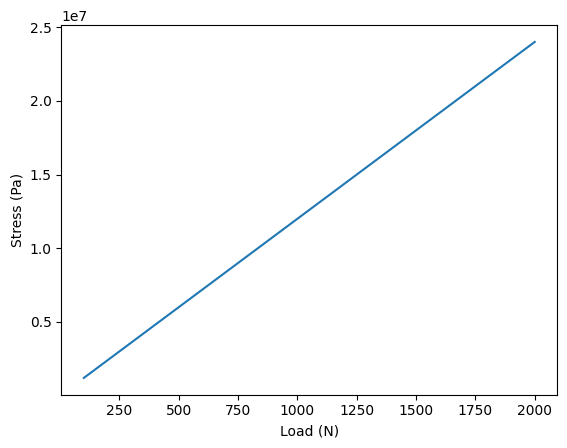

In [11]:
# Section 1: Physics Baseline (Day-1)

import numpy as np
import matplotlib.pyplot as plt

def max_bending_stress(L, b, h, P):
    I = b*h**3/12
    M = P*L
    y = h/2
    return M*y/I

L=1.0; b=0.05; h=0.1; P=1000
print(max_bending_stress(L,b,h,P))

P_vals = np.linspace(100,2000,20)
stress = [max_bending_stress(L,b,h,p) for p in P_vals]

print(P_vals)
print(stress)


plt.plot(P_vals, stress)
plt.xlabel("Load (N)")
plt.ylabel("Stress (Pa)")
plt.show()

Filtered dataset shape: (9974, 5)
Filtered stress max: 1246997606.4551542
Dataset shape: (9974, 5)


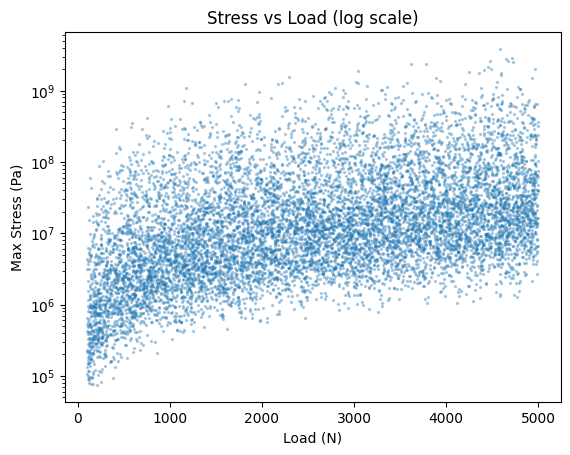

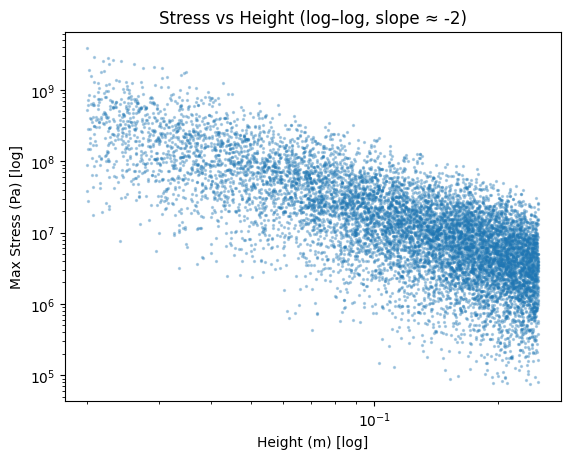

Saved: beam_stress_data.csv
Stress min: 74633.34877523102
Stress max: 3838755215.8435273


In [27]:
# ================================
# Day-2: Synthetic Data Generation
# ================================

# Purpose:
# Generate a physics-based dataset for beam bending stress
# This will act as ground-truth data for ML (later days)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Reproducibility
# -------------------------------
np.random.seed(42)  # ensures same dataset every run

# -------------------------------
# Number of samples
# -------------------------------
N = 10_000  # enough to train a small ML model later

# -------------------------------
# Parameter ranges (engineering-driven, realistic)
# -------------------------------
# Length (m)
L_min, L_max = 0.3, 2.0

# Width (m)
b_min, b_max = 0.02, 0.15

# Height (m)
h_min, h_max = 0.02, 0.25

# Load (N)
P_min, P_max = 100.0, 5000.0

# -------------------------------
# Random sampling of parameters
# -------------------------------
L = np.random.uniform(L_min, L_max, N)
b = np.random.uniform(b_min, b_max, N)
h = np.random.uniform(h_min, h_max, N)
P = np.random.uniform(P_min, P_max, N)

# -------------------------------
# Stress calculation using Day-1 physics
# -------------------------------
# Using cantilever beam with tip load:
# sigma = (M * y) / I
# M = P * L
# y = h / 2
# I = b * h^3 / 12

I = b * h**3 / 12.0
M = P * L
y = h / 2.0

stress = (M * y) / I  # bending stress in Pascals

# -------------------------------
# Build dataset
# -------------------------------
df = pd.DataFrame({
    "Length_m": L,
    "Width_m": b,
    "Height_m": h,
    "Load_N": P,
    "MaxStress_Pa": stress
})

# -------------------------------
# Material realism filter (steel)
# -------------------------------
STEEL_MAX_STRESS = 1.25e9  # Pa (~180 ksi)

df = df[df["MaxStress_Pa"] <= STEEL_MAX_STRESS]

print("Filtered dataset shape:", df.shape)
print("Filtered stress max:", df["MaxStress_Pa"].max())

print("Dataset shape:", df.shape)
df.head()

# -------------------------------
# Sanity checks (physics trends)
# -------------------------------

# Stress vs Load (should be linear)
plt.figure()
plt.scatter(P, stress, s=2, alpha=0.3)
plt.yscale("log")
plt.xlabel("Load (N)")
plt.ylabel("Max Stress (Pa)")
plt.title("Stress vs Load (log scale)")
plt.show()

# Stress vs Height (inverse square trend)
plt.figure()
plt.scatter(h, stress, s=2, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Height (m) [log]")
plt.ylabel("Max Stress (Pa) [log]")
plt.title("Stress vs Height (log–log, slope ≈ -2)")
plt.show()

# -------------------------------
# Save dataset
# -------------------------------
df.to_csv("beam_stress_data.csv", index=False)
print("Saved: beam_stress_data.csv")

print("Stress min:", stress.min())
print("Stress max:", stress.max())
